In [2]:
library(gridExtra)
library(grid)
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



In [3]:
final_res <- read.table("significant_name.txt",sep = ",")
head(final_res)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
Cyp4p2,-12.453012,6.511032,0,0
Ilp8,-12.280491,8.751890,0,0
Cyp12c1,-10.644465,6.052086,0,0
Spn100A,8.141374,6.740792,0,0
CG14960,-7.757599,5.496073,0,0
CG15784,-5.632429,8.407028,0,0


Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“ggrepel: 594 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 640 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


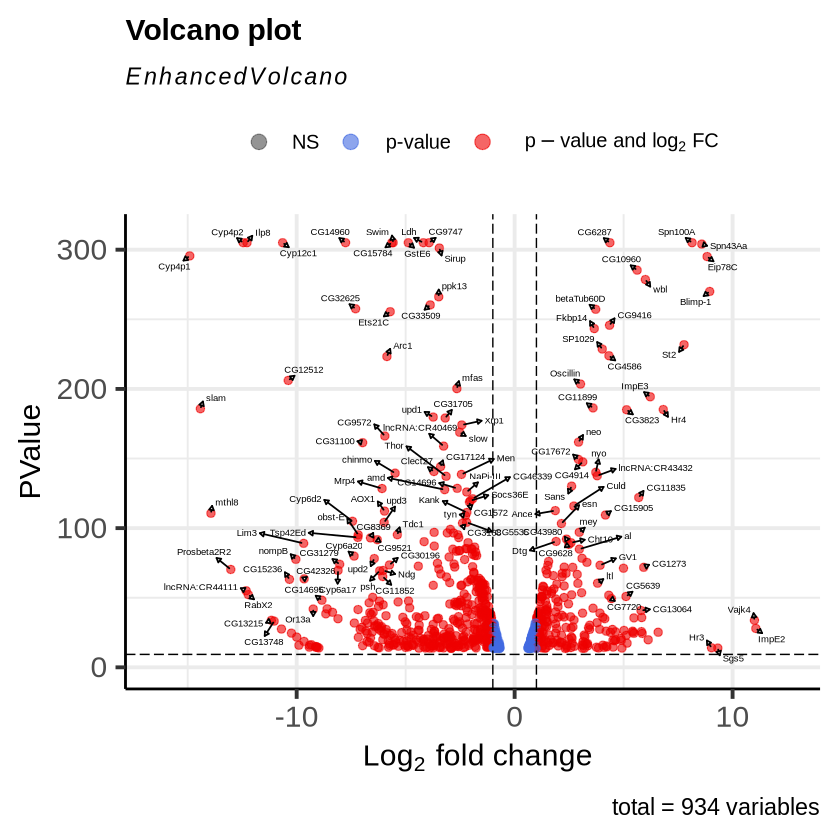

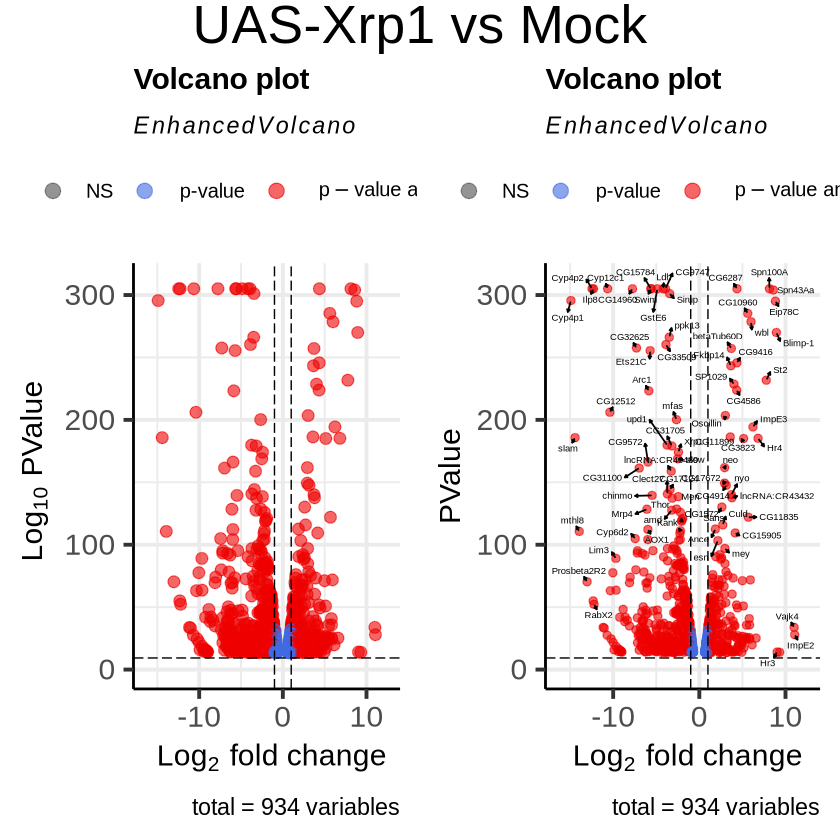

In [5]:
# 左の図 (遺伝子名のラベルなし) を作る
p1 <- EnhancedVolcano(final_res,
        lab = rownames(final_res),
        x = 'logFC',
        y = 'PValue',
        xlab = bquote(~Log[2]~ 'fold change'),
        ylab = bquote(~Log[10]~ 'PValue'),
        pCutoff = 5*10^(-10),
        FCcutoff = 1.0,
        pointSize = 3.0,
        labSize = 0,
        colAlpha = 3/5,
        legendLabSize = 12,
        legendIconSize = 4.0,
        legendPosition = 'top',
        drawConnectors = FALSE)

# 右の図 (遺伝子名のラベルあり) を作る
p2 <- EnhancedVolcano(final_res,
        lab = rownames(final_res),
        x = 'logFC',
        y = 'PValue',
        xlab = bquote(~Log[2]~ 'fold change'),
        ylab = bquote('PValue'),
        pCutoff = 5*10^(-10),
        FCcutoff = 1.0,
        pointSize = 2.0,
        labSize = 2.0,
        colAlpha = 3/5,
        legendLabSize = 12,
        legendIconSize = 4.0,
        legendPosition = 'top',
        drawConnectors = TRUE,
        widthConnectors = 0.5,
        colConnectors = 'black')
p2
# 2つの図を並べる
grid.arrange(p1, p2,
            ncol = 2,
            nrow = 1,
            top = textGrob("UAS-Xrp1 vs Mock",
            gp = gpar(fontsize = 32)))
